In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feather
import datetime
from matplotlib_venn import venn2
pd.set_option('display.max_Columns', 100)

In [2]:
train = pd.read_csv('../inputs/train.csv')
print(train.shape)
test = pd.read_csv('../inputs/test.csv')
print(test.shape)
sample = pd.read_csv('../inputs/atmaCup8_sample-submission.csv')
print(sample.shape)

(8359, 16)
(8360, 11)
(8360, 1)


In [3]:
train['User_Score'] = train['User_Score'].replace({'nan': np.NaN, 'tbd': np.NaN}).astype(float)
test['User_Score'] = test['User_Score'].replace({'nan': np.NaN, 'tbd': np.NaN}).astype(float)

In [4]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [5]:
test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8.0,19.0,Io Interactive,M
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9.0,132.0,Crystal Dynamics,T
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M


In [6]:
train.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales             int64
EU_Sales             int64
JP_Sales             int64
Other_Sales          int64
Global_Sales         int64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
test.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [43]:
train['User_Count_log'] = train['User_Count'].apply(lambda x: np.log1p(x))
test['User_Count_log'] = test['User_Count'].apply(lambda x: np.log1p(x))

In [44]:
train.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,User_Count_log
count,8275.000000,8359.000000,8359.000000,8359.000000,8359.000000,8359.000000,3976.000000,3976.00000,3699.000000,3699.000000,3699.000000
mean,2006.393716,30.719943,16.067711,11.308889,5.241058,63.371815,69.187626,28.53999,7.255474,180.262503,3.680579
std,6.099621,104.349935,60.936947,41.215915,22.941531,199.394856,13.756481,20.42759,1.426251,576.988465,1.539503
min,1980.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.00000,0.000000,4.000000,1.609438
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,6.000000,61.000000,12.00000,6.600000,11.000000,2.484907
50%,2007.000000,8.000000,2.000000,0.000000,1.000000,18.000000,71.000000,24.00000,7.600000,28.000000,3.367296
75%,2010.000000,25.000000,12.000000,6.000000,4.000000,51.000000,79.000000,40.00000,8.300000,100.000000,4.615121
max,2017.000000,4136.000000,2896.000000,1022.000000,1057.000000,8253.000000,98.000000,113.00000,9.700000,9851.000000,9.195430


In [45]:
test.describe()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,User_Count_log
count,8175.000000,4161.000000,4161.000000,3891.000000,3891.000000,3891.000000
mean,2006.582141,68.757510,24.278539,7.001054,145.087124,3.455771
std,5.645690,14.108034,17.233075,1.556990,545.454160,1.445831
min,1980.000000,13.000000,3.000000,0.200000,4.000000,1.609438
25%,2003.000000,60.000000,11.000000,6.200000,9.000000,2.302585
50%,2007.000000,71.000000,20.000000,7.400000,22.000000,3.135494
75%,2010.000000,79.000000,33.000000,8.100000,65.000000,4.189655
max,2020.000000,98.000000,100.000000,9.600000,10665.000000,9.274816


In [12]:
def drawVenn(col):
    train_uniq = set(train[col].unique())
    test_uniq = set(test[col].unique())
    union = train_uniq | test_uniq
    intersection = train_uniq & test_uniq
    onlyTrain = train_uniq - intersection
    onlyTest = test_uniq - intersection

    print(col, len(union))
        
    if len(intersection) == 0:
        print('intersection = 0')
    elif len(intersection) < 100:
        print('intersection', intersection)
    
    if len(onlyTrain) == 0:
        print('onlyTrain = 0')
    elif len(onlyTrain) < 100:
        print('onlyTrain', onlyTrain)
    
    if len(onlyTest) == 0:
        print('onlyTest = 0')
    elif len(onlyTest) < 100:
        print('onlyTest', onlyTest)
        
    venn2(subsets=(train_uniq, test_uniq), set_labels=('train_'+col, 'test_'+col))

Name 11563


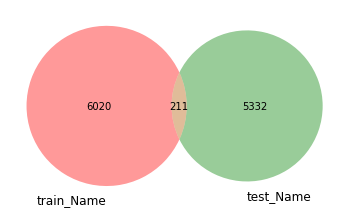

In [13]:
drawVenn('Name')

Platform 31
intersection {'GC', '3DS', 'PC', 'WS', 'PS', '2600', 'NG', 'SNES', 'GEN', 'SAT', 'X360', 'DS', '3DO', 'PSP', 'PSV', 'WiiU', 'PS2', 'PS3', 'NES', 'N64', 'PS4', 'DC', 'Wii', 'GB', 'TG16', 'XOne', 'XB', 'GBA'}
onlyTrain {'SCD', 'GG', 'PCFX'}
onlyTest = 0


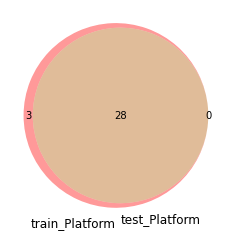

In [14]:
drawVenn('Platform')

Genre 13
intersection {'Adventure', 'Fighting', 'Sports', 'Misc', 'Action', 'Simulation', 'Strategy', 'Puzzle', 'Shooter', 'Platform', 'Role-Playing', 'Racing'}
onlyTrain = 0
onlyTest {nan}


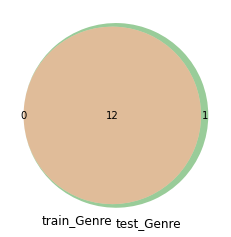

In [15]:
drawVenn('Genre')

Publisher 582
intersection = 0


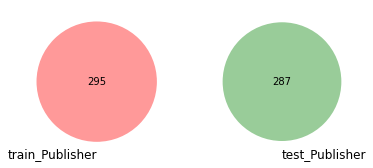

In [16]:
drawVenn('Publisher')

Developer 1697


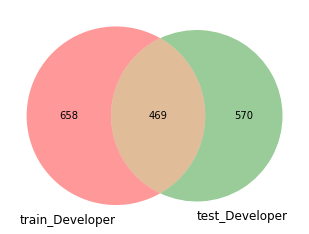

In [17]:
drawVenn('Developer')

Rating 9
intersection {nan, 'E', 'K-A', 'M', 'RP', 'E10+', 'T'}
onlyTrain {'AO', 'EC'}
onlyTest = 0


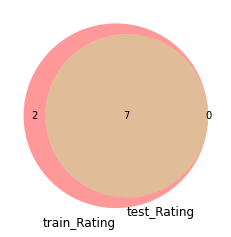

In [18]:
drawVenn('Rating')

User_Score 97
intersection {0.5, 1.0, 2.0, 2.2, 4.1, 5.7, 6.3, 6.6, 7.8, 7.4, 7.9, 8.0, 8.3, 7.0, 6.8, 7.2, 7.6, 8.5, 9.5, 2.5, 3.5, 4.5, 4.0, 3.0, 5.0, 5.5, 6.5, 6.0, 7.5, 9.0, 1.9, 2.4, 2.9, 3.4, 3.9, 4.9, 4.4, 5.4, 5.9, 6.4, 6.9, 8.9, 8.4, 9.4, 2.8, 3.8, 3.3, 4.8, 4.3, 1.8, 1.3, 5.3, 5.8, 7.3, 0.6, 0.9, 8.7, 8.2, 8.8, 9.2, 9.3, 1.2, 1.7, 2.7, 3.2, 3.7, 4.7, 4.2, 5.2, 6.7, 6.2, 7.7, 4.6, 5.1, 5.6, 6.1, 7.1, 1.1, 1.6, 8.1, 8.6, 2.1, 9.1, 3.6, 3.1}
onlyTrain {nan, 0.0, 9.7}
onlyTest {nan, 1.5, 2.3, 0.2, 1.4, 0.7, 0.3, 2.6, 9.6}


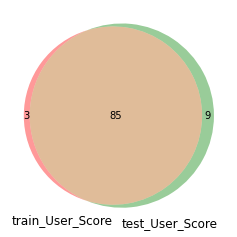

In [19]:
drawVenn('User_Score')

In [32]:
def draw_bar_plot(col, bins=20):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.hist([train[col], test[col]], bins=bins, label=['train', 'test'])
    ax.legend()
    ax.set_xlabel(col)

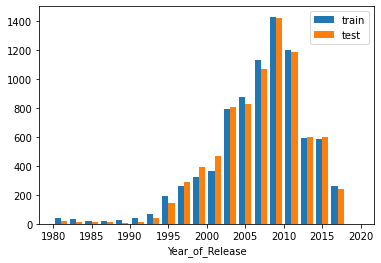

In [34]:
draw_bar_plot('Year_of_Release')

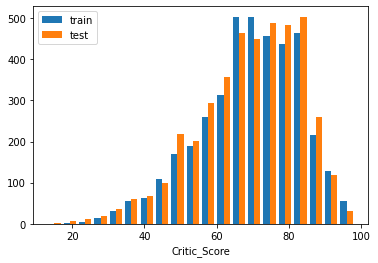

In [35]:
draw_bar_plot('Critic_Score')

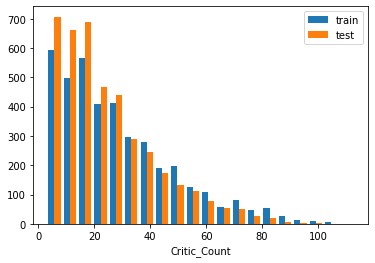

In [36]:
draw_bar_plot('Critic_Count')

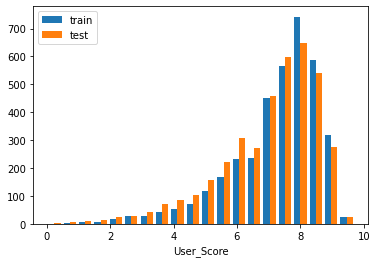

In [37]:
draw_bar_plot('User_Score')

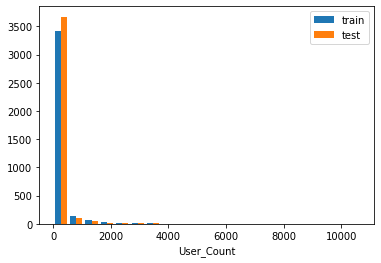

In [46]:
draw_bar_plot('User_Count')

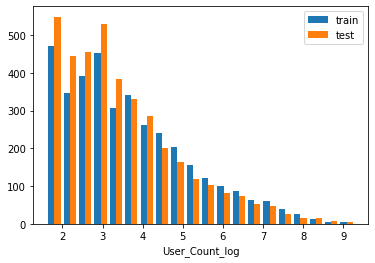

In [47]:
draw_bar_plot('User_Count_log')